No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


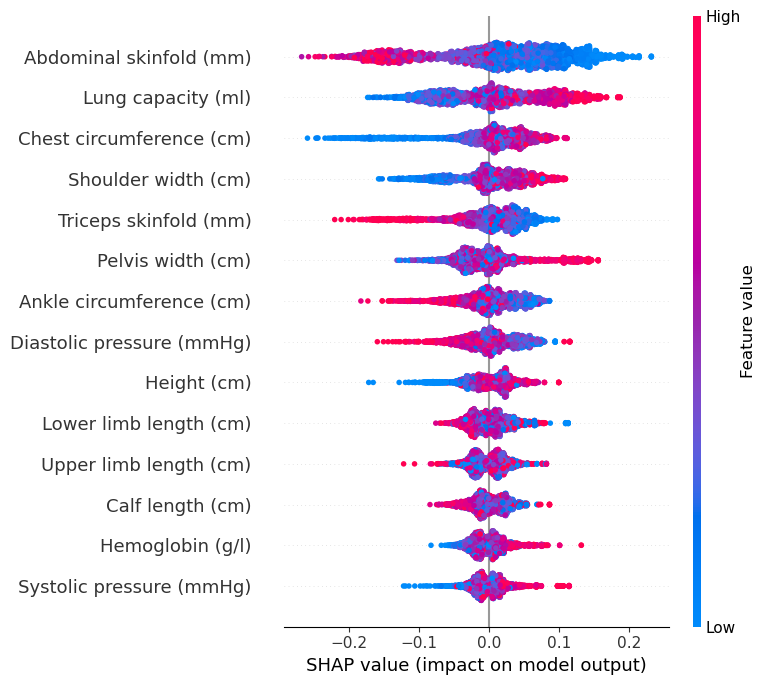

In [2]:
import pandas as pd
import shap
from joblib import load
import matplotlib.pyplot as plt

# Load the previously saved random forest model
model = load('final_model_rf.joblib')

# Read the training set
training_set = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")

# Separate the target variable and keep only the feature variables
X = training_set.drop('Rank', axis=1)  # Assuming '名次' translates to 'Rank'

# Build the SHAP Explainer, calculate the SHAP values, specifying the use of tree algorithm
explainer = shap.Explainer(model, algorithm="tree")
shap_values = explainer(X)

# Set the font size
plt.rcParams.update({'font.size': 15})  # Adjust to a larger font size

# Set figure dimension to square format
plt.figure(figsize=(5, 5))  # Width x Height

# Visualize the SHAP values for the top 14 features (assuming it's a binary classification problem, select the SHAP values of the positive class)
shap.summary_plot(shap_values[:,:,1], X, max_display=14, show=False)

# Save the figure to a PDF file
plt.savefig('Fig3C.pdf', bbox_inches='tight')

# Display the figure on the page
plt.show()